# Car Engine Risk Predicting Model

Here I'm using 'Automobile' dataset to predict 'engine_risk' 

In [1]:
%pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder 

In [3]:
# Load dataset
url = "https://archive.ics.uci.edu/static/public/10/data.csv"
df = pd.read_csv(url)

In [4]:
df.describe() 

,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling
count,164.000000,203.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000,205.000000
mean,122.000000,3.123153,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353,0.834146
std,35.442168,0.994841,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342,1.245307
min,65.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,-2.000000
25%,94.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,0.000000
50%,115.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,1.000000
75%,150.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,2.000000
max,256.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000,3.000000


In [5]:
df.head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling
0,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,3
1,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,3
2,NaN,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1
3,164.0,audi,gas,std,4.0,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,2
4,164.0,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,2


# Data Preprocessing

In [6]:
# Handle Missing Values

# mean imputation
continuous_features = ['price', 'peak-rpm', 'horsepower', 'stroke', 'bore', 'normalized-losses']
imputer_cont = SimpleImputer(strategy='mean')
df[continuous_features] = imputer_cont.fit_transform(df[continuous_features])

In [7]:
# mode imputation
categorical_features = ['num-of-doors']
imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_features] = imputer_cat.fit_transform(df[categorical_features])

In [8]:
# One-hot encode categorical features
categorical_features = ['fuel-system', 'engine-type', 'drive-wheels', 'body-style', 'make']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [9]:
df.head()

,normalized-losses,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,...,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
0,122.0,gas,std,2.0,front,88.6,168.8,64.1,48.8,2548,...,False,False,False,False,False,False,False,False,False,False
1,122.0,gas,std,2.0,front,88.6,168.8,64.1,48.8,2548,...,False,False,False,False,False,False,False,False,False,False
2,122.0,gas,std,2.0,front,94.5,171.2,65.5,52.4,2823,...,False,False,False,False,False,False,False,False,False,False
3,164.0,gas,std,4.0,front,99.8,176.6,66.2,54.3,2337,...,False,False,False,False,False,False,False,False,False,False
4,164.0,gas,std,4.0,front,99.4,176.6,66.4,54.3,2824,...,False,False,False,False,False,False,False,False,False,False


In [10]:
# Encode Categorical Variables
binary_features = ['engine-location', 'aspiration', 'fuel-type']
df[binary_features] = df[binary_features].apply(lambda x: x.astype('category').cat.codes)

In [11]:
# Normalizing 
continuous_features = ['price', 'highway-mpg', 'city-mpg', 'peak-rpm', 'horsepower', 'compression-ratio', 'stroke', 'bore', 'engine-size', 'curb-weight', 'height', 'width', 'length', 'wheel-base', 'normalized-losses']
scaler = StandardScaler()
df[continuous_features] = scaler.fit_transform(df[continuous_features])

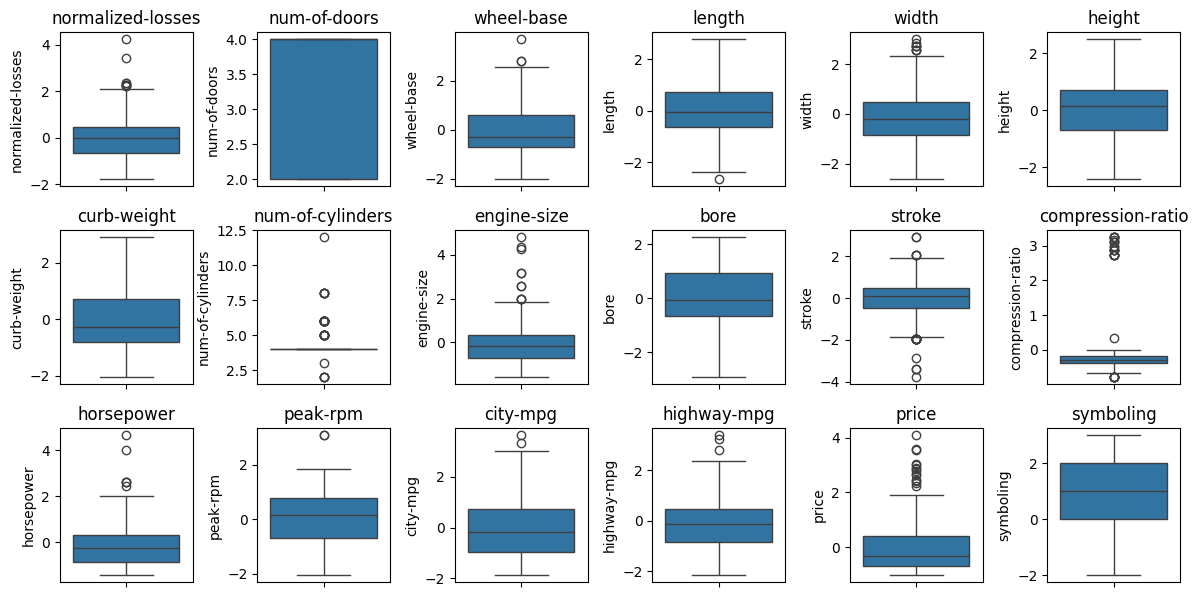

In [12]:
# Handling Outliers

# Visualize for outliers
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 6, i)
    sns.boxplot(data=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [13]:
# Handling Outliers
continuous_features = ['highway-mpg', 'city-mpg', 'peak-rpm', 'horsepower', 'bore', 'curb-weight', 'height', 'length', 'wheel-base']
for col in continuous_features:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df.loc[:, col] = np.clip(df[col], lower_bound, upper_bound)

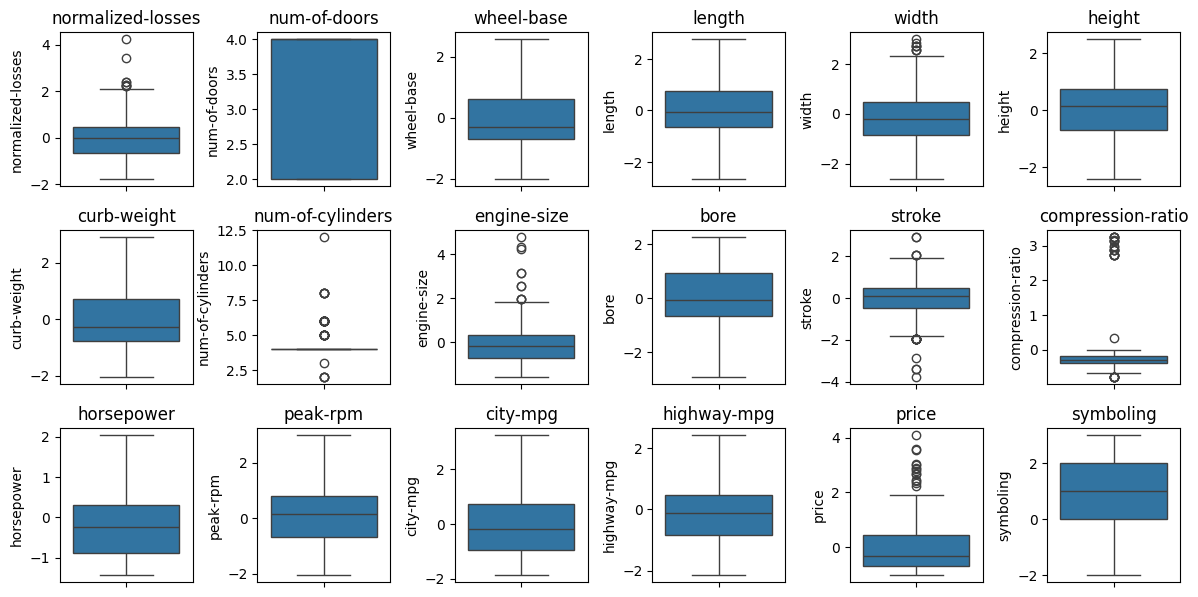

In [14]:
# Visualize for after handling outliers
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 6, i)
    sns.boxplot(data=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [15]:
# Normalize
scaler = StandardScaler()
df[['num-of-cylinders']] = scaler.fit_transform(df[['num-of-cylinders']])

# Creating a new feature

In [16]:
# Feature Engineering
df['engine_risk'] = (df['engine-size'] * df['num-of-cylinders'] / (df['curb-weight']))

In [17]:
df.isnull().sum().head(60)

normalized-losses       0
fuel-type               0
aspiration              0
num-of-doors            0
engine-location         0
wheel-base              0
length                  0
width                   0
height                  0
curb-weight             0
num-of-cylinders        0
engine-size             0
bore                    0
stroke                  0
compression-ratio       0
horsepower              0
peak-rpm                0
city-mpg                0
highway-mpg             0
price                   0
symboling               0
fuel-system_2bbl        0
fuel-system_4bbl        0
fuel-system_idi         0
fuel-system_mfi         0
fuel-system_mpfi        0
fuel-system_spdi        0
fuel-system_spfi        0
engine-type_dohcv       0
engine-type_l           0
engine-type_ohc         0
engine-type_ohcf        0
engine-type_ohcv        0
engine-type_rotor       0
drive-wheels_fwd        0
drive-wheels_rwd        0
body-style_hardtop      0
body-style_hatchback    0
body-style_s

In [18]:
df.head(50)

,normalized-losses,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,...,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,engine_risk
0,0.000000,1,0,2.0,0,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,...,False,False,False,False,False,False,False,False,False,1.803621
1,0.000000,1,0,2.0,0,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,...,False,False,False,False,False,False,False,False,False,1.803621
2,0.000000,1,0,2.0,0,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,...,False,False,False,False,False,False,False,False,False,1.762145
3,1.328961,1,0,4.0,0,0.173698,0.207256,0.136542,0.235942,-0.420797,...,False,False,False,False,False,False,False,False,False,-0.361507
4,1.328961,1,0,4.0,0,0.107110,0.207256,0.230001,0.235942,0.516807,...,False,False,False,False,False,False,False,False,False,0.243350
5,0.000000,1,0,2.0,0,0.173698,0.264133,0.183272,-0.256354,-0.093502,...,False,False,False,False,False,False,False,False,False,-1.345049
6,1.139109,1,0,4.0,0,1.172521,1.515437,2.566488,0.810288,0.555313,...,False,False,False,False,False,False,False,False,False,0.226476
7,0.000000,1,0,4.0,0,1.172521,1.515437,2.566488,0.810288,0.767092,...,False,False,False,False,False,False,False,False,False,0.163950
8,1.139109,1,1,4.0,0,1.172521,1.515437,2.566488,0.892338,1.021227,...,False,False,False,False,False,False,False,False,False,0.055431
9,0.000000,1,1,2.0,0,0.123757,0.337262,0.930947,-0.707626,0.957693,...,False,False,False,False,False,False,False,False,False,0.059108


# Changing Existing Target into New Target. 

'symboling' is the existing target. I created a new target named 'engine_risk' by using feature engineering. So here I replace existing target with new target. 

In [19]:
# Drop the old target
df = df.drop('symboling', axis=1)

# Set the new target
X = df.drop('engine_risk', axis=1)
y = df['engine_risk']

In [20]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Performance by Individual Models

In [21]:
# Using Random Forest
rf_model = RandomForestRegressor(n_estimators=50, max_depth=3,  min_samples_leaf=5, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, min_samples_leaf=5, n_estimators=50,
                      random_state=42)

In [22]:
test_accuracy = rf_model.score(X_test, y_test)
print(f"Accuracy: {test_accuracy * 100:.2f}%")

Accuracy: 77.55%


In [23]:
# Using Gradiend Boosting
gb_model = GradientBoostingRegressor(n_estimators=50, max_depth=2,  min_samples_leaf=5, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, min_samples_leaf=5, n_estimators=50,
                          random_state=42)

In [24]:
test_accuracy = gb_model.score(X_test, y_test)
print(f"Accuracy: {test_accuracy * 100:.2f}%")

Accuracy: 78.00%


In [25]:
# Using LightGBM
lgbm_model = LGBMRegressor(n_estimators=50, min_child_samples=8, learning_rate=0.1, num_leaves=10, reg_alpha=0.1, reg_lambda=0.1, random_state=42, force_col_wise=True)
lgbm_model.fit(X_train, y_train)

[LightGBM] [Info] Total Bins 513
[LightGBM] [Info] Number of data points in the train set: 164, number of used features: 41
[LightGBM] [Info] Start training from score 0.310689


LGBMRegressor(force_col_wise=True, min_child_samples=8, n_estimators=50,
              num_leaves=10, random_state=42, reg_alpha=0.1, reg_lambda=0.1)

In [26]:
test_accuracy = lgbm_model.score(X_test, y_test)
print(f"Accuracy: {test_accuracy * 100:.2f}%")

Accuracy: 85.87%


# Performance by Voting Regressor Model

In [27]:
# Define individual models
rf_model = RandomForestRegressor(n_estimators=50, max_depth=3,  min_samples_leaf=5, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=50, max_depth=2,  min_samples_leaf=5, learning_rate=0.1, subsample=0.8, random_state=42)
lgbm_model = LGBMRegressor(n_estimators=50, min_child_samples=8, learning_rate=0.1, num_leaves=10, reg_alpha=0.1, reg_lambda=0.1, random_state=42, force_col_wise=True)

# Create Voting Regressor
voting_reg = VotingRegressor(
    estimators=[
        ('rf', rf_model),    
        ('gb', gb_model),    
        ('lgbm', lgbm_model)
    ]
)

In [28]:
# Fit the Voting Regressor
voting_reg.fit(X_train, y_train)

[LightGBM] [Info] Total Bins 513
[LightGBM] [Info] Number of data points in the train set: 164, number of used features: 41
[LightGBM] [Info] Start training from score 0.310689


VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(max_depth=3,
                                                   min_samples_leaf=5,
                                                   n_estimators=50,
                                                   random_state=42)),
                            ('gb',
                             GradientBoostingRegressor(max_depth=2,
                                                       min_samples_leaf=5,
                                                       n_estimators=50,
                                                       random_state=42,
                                                       subsample=0.8)),
                            ('lgbm',
                             LGBMRegressor(force_col_wise=True,
                                           min_child_samples=8, n_estimators=50,
                                           num_leaves=10, random_state=42,
                                           reg_alpha=0.1, reg_lambda=0.1))])

In [29]:
test_accuracy = voting_reg.score(X_test, y_test)
print(f"Accuracy: {test_accuracy * 100:.2f}%")

Accuracy: 91.18%


Performance of voting regressor model is high, when comparing with Random forest, Gradiend Boosting and LightGBM models 
seperatly. 

# Predictions on Test Data

In [30]:
# Make predictions
y_pred = voting_reg.predict(X_test)
print(y_pred)

[ 1.55714102e+00 -7.66253112e-01 -2.06296752e-01  7.26980601e-01
  6.30099886e-01 -8.65151230e-02 -1.28145521e-01 -1.71154968e-01
 -1.20496179e-01  1.14665018e-01  1.64665665e+00 -1.63338343e-02
 -1.42180594e-01  2.59329046e-01  4.77587362e+00 -5.19630119e-02
 -7.87790388e-01  4.61662856e-02 -1.32534361e-01  1.76743278e-03
 -5.01932662e-01  1.84408254e+00 -1.46062228e-01  2.13578243e-01
 -9.02294047e-01  2.64488218e+00  3.12533516e+00  2.03495156e-01
 -1.48684701e-01  1.37281138e-01  6.63722219e-01 -9.64542820e-01
 -2.22619173e-01  1.77643953e+00 -1.75889086e-01  8.32395306e-01
 -1.14419400e-01 -7.78088037e+00 -7.60984092e-01  2.96682781e-02
 -9.68040661e-02]


# Model Evaluation

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f} \nMAE: {mae:.2f} \nR²: {r2:.2f}")

MSE: 0.33 
MAE: 0.45 
R²: 0.91
